c:\Users\loren\Documents\GitHub\Computer-Architecture-Project
c:\Users\loren\Documents\GitHub\Computer-Architecture-Project\results\seq
dir:  10
Directory:  c:\Users\loren\Documents\GitHub\Computer-Architecture-Project\results\seq\10
dir:  11
Directory:  c:\Users\loren\Documents\GitHub\Computer-Architecture-Project\results\seq\11
dir:  12
Directory:  c:\Users\loren\Documents\GitHub\Computer-Architecture-Project\results\seq\12
dir:  13
Directory:  c:\Users\loren\Documents\GitHub\Computer-Architecture-Project\results\seq\13
dir:  14
Directory:  c:\Users\loren\Documents\GitHub\Computer-Architecture-Project\results\seq\14
dir:  AMDuProf-seq-TBP_Apr-05-2024_16-21-08
dir:  AMDuProf-seq-TBP_Apr-05-2024_16-21-09
dir:  AMDuProf-seq-TBP_Apr-05-2024_16-21-10
dir:  AMDuProf-seq-TBP_Apr-05-2024_16-21-11
dir:  AMDuProf-seq-TBP_Apr-05-2024_16-21-12
dir:  AMDuProf-seq-TBP_Apr-05-2024_16-21-13
dir:  AMDuProf-seq-TBP_Apr-05-2024_16-21-14
dir:  AMDuProf-seq-TBP_Apr-05-2024_16-21-15
dir:  AMDuProf-seq-TBP

c:\Users\loren\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\loren\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\loren\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


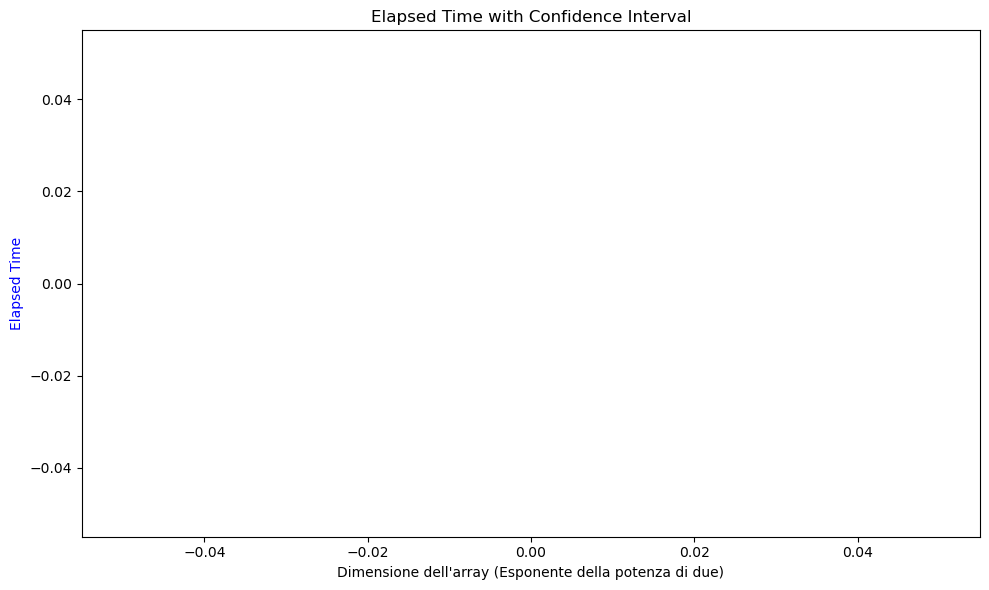

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_with_confidence_interval(x_values, y_mean, color, marker, y_label, title, save_path):
    # Calcola l'intervallo di confidenza
    ci = 1.96 * np.std(y_mean) / np.sqrt(len(y_mean))
    
    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=ci, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Funzione per leggere i dati e calcolare le statistiche
def read_data_and_calculate_statistics(directory):
    # Inizializza le liste per memorizzare i dati
    elapsed_times = []

    directory+= "\"

    # Percorri tutte le sottocartelle
    print("Directory: ", directory)
    size = int(directory)  # La dimensione dell'array è rappresentata dall'esponente della potenza di due
    for dir in os.listdir(directory):
        print("dirint: ", dir)
        try:
            # Costruisci il percorso completo del file CSV
            file_path = os.path.join(path, directory, "report.csv")
            
            # Leggi il file CSV
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            # Estrai l'Elapsed time
            elapsed_time = None
            for line in lines:
                if line.startswith("Elapsed Time"):
                    elapsed_time = float(line.split(",")[1].strip().split(" ")[0])
                    break
            
            if elapsed_time is not None:
                elapsed_times.append(elapsed_time)
        except ValueError:
            pass

    # Calcola la media dei tempi elapsed_times
    mean_elapsed_time = np.mean(elapsed_times)
    
    # Calcola l'intervallo di confidenza
    ci = 1.96 * np.std(elapsed_times) / np.sqrt(len(elapsed_times))
    
    return mean_elapsed_time, ci

# Utilizzo della funzione per calcolare statistiche e generare il grafico
# Imposta i valori necessari per il percorso, le ripetizioni e il numero di configurazioni
path = os.getcwd()
print(path)
path = os.path.join(path, "results", "seq")
print(path)

# Leggi i dati e calcola le statistiche
mean_elapsed_times = []
cis = []
sizes = []

for root, dirs, files in os.walk(path):
    for directory in dirs:
        try:
            print("dir: ", directory)
            size = int(directory)
            mean_elapsed_time, ci = read_data_and_calculate_statistics(os.path.join(path, directory))
            sizes.append(size)
            mean_elapsed_times.append(mean_elapsed_time)
            cis.append(ci)
        except ValueError:
            continue

# Genera il grafico utilizzando la funzione per l'intervallo di confidenza
plot_with_confidence_interval(sizes, mean_elapsed_times, 'blue', 'o', 'Elapsed Time', 'Elapsed Time with Confidence Interval', 'grafico.png')
